1. Plotting $\varepsilon_{\ell}$ vs. $y$ for each gauge with linear regression

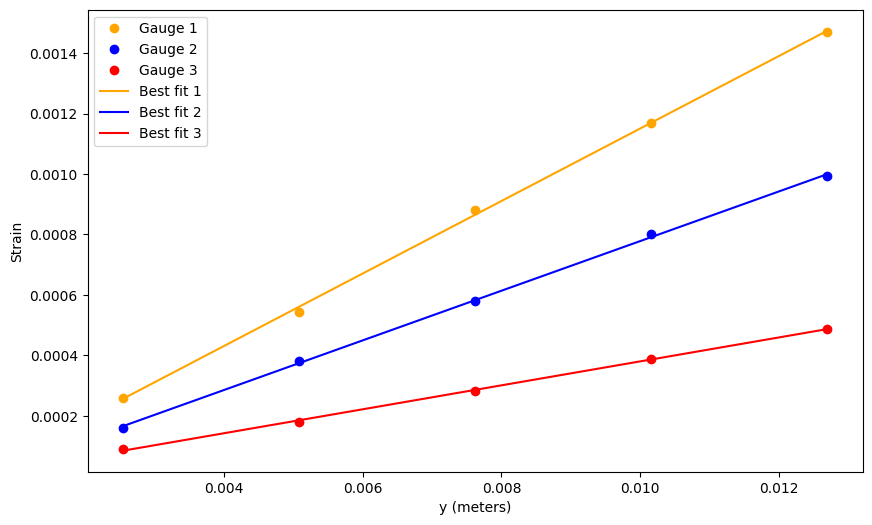

Expected slope for Gauge 1: 0.13202405111569604
Expected slope for Gauge 2: 0.08809310591082348
Expected slope for Gauge 3: 0.04358412195325517
------------------------------------
Slope for Gauge 1: 0.1198818897637795
Slope for Gauge 2: 0.08208661417322834
Slope for Gauge 3: 0.03960629921259842
------------------------------------
Percent error for Gauge 1: 9.196931354027344
Percent error for Gauge 2: 6.81834483583256
Percent error for Gauge 3: 9.126770397997333
------------------------------------
R-squared for Gauge 1: 0.9994637274981135
R-squared for Gauge 2: 0.999474193886579
R-squared for Gauge 3: 0.9994153825491692


In [17]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([0.1,
                0.2,
                0.3,
                0.4,
                0.5])
y = y * 0.0254 # convert to meters

# Gauge 1
strain_1 = np.array([0.00026,
                     0.000545,
                     0.00088,
                     0.00117,
                     0.00147])

# Gauge 2
strain_2 = np.array([0.00016,
                     0.00038,
                     0.00058,
                     0.000801,
                     0.000992])

# Gauge 3
strain_3 = np.array([0.000089,
                     0.000181,
                     0.000282,
                     0.000389,
                     0.000488])

# Performing linear regression and getting the slope and intercept
slope_1, intercept_1 = np.polyfit(y, strain_1, 1)
slope_2, intercept_2 = np.polyfit(y, strain_2, 1)
slope_3, intercept_3 = np.polyfit(y, strain_3, 1)

# Creating lines of best fit
best_fit_1 = slope_1 * y + intercept_1
best_fit_2 = slope_2 * y + intercept_2
best_fit_3 = slope_3 * y + intercept_3

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(y, strain_1, 'o', label='Gauge 1', color='orange')
plt.plot(y, strain_2, 'o', label='Gauge 2', color='blue')
plt.plot(y, strain_3, 'o', label='Gauge 3', color='red')

# Plotting lines of best fit
plt.plot(y, best_fit_1, '-', color='orange', label='Best fit 1')
plt.plot(y, best_fit_2, '-', color='blue', label='Best fit 2')
plt.plot(y, best_fit_3, '-', color='red', label='Best fit 3')

plt.xlabel('y (meters)')
plt.ylabel('Strain')
plt.legend()
plt.show()

# Comparing the slopes with the expected slopes
a1 = 0.63 / 100 # thickness of the beam in m
b1 = 2.52 / 100 # width of the beam in m

d1 = 2.54 / 100 # distance from the clasp to gauge 1 in m
d2 = 10.14 / 100 # distance from the clasp to gauge 2 in m
d3 = 17.84 / 100 # distance from the clasp to gauge 3 in m

d_micrometer = 25.38 / 100 # distance from the clasp to the micrometer in m

def expected_strain(a, L, x, y):
    return (3*a*(L-x)*y) / (2 * L**3)

# Calculate expected strain for each y value for each gauge
expected_strain_1 = expected_strain(a1, d_micrometer, d1, y)
expected_strain_2 = expected_strain(a1, d_micrometer, d2, y)
expected_strain_3 = expected_strain(a1, d_micrometer, d3, y)

# Perform linear regression to get slope and intercept
expected_slope_1, _ = np.polyfit(y, expected_strain_1, 1)
expected_slope_2, _ = np.polyfit(y, expected_strain_2, 1)
expected_slope_3, _ = np.polyfit(y, expected_strain_3, 1)

# Print the calculated slopes
print("Expected slope for Gauge 1:", expected_slope_1)
print("Expected slope for Gauge 2:", expected_slope_2)
print("Expected slope for Gauge 3:", expected_slope_3)

print('------------------------------------')

# Print the slopes from the linear regression
print("Slope for Gauge 1:", slope_1)
print("Slope for Gauge 2:", slope_2)
print("Slope for Gauge 3:", slope_3)

print('------------------------------------')

# Calculate the percent error
percent_error_1 = abs((slope_1 - expected_slope_1) / expected_slope_1) * 100
percent_error_2 = abs((slope_2 - expected_slope_2) / expected_slope_2) * 100
percent_error_3 = abs((slope_3 - expected_slope_3) / expected_slope_3) * 100

print("Percent error for Gauge 1:", percent_error_1)
print("Percent error for Gauge 2:", percent_error_2)
print("Percent error for Gauge 3:", percent_error_3)

print('------------------------------------')

# Calculate R-squared values for each line of best fit
r_squared_1 = np.corrcoef(y, strain_1)[0, 1]**2
r_squared_2 = np.corrcoef(y, strain_2)[0, 1]**2
r_squared_3 = np.corrcoef(y, strain_3)[0, 1]**2

# Print the R-squared values
print("R-squared for Gauge 1:", r_squared_1)
print("R-squared for Gauge 2:", r_squared_2)
print("R-squared for Gauge 3:", r_squared_3)

2. Plotting $\varepsilon_{\ell}$ as a function of $W$

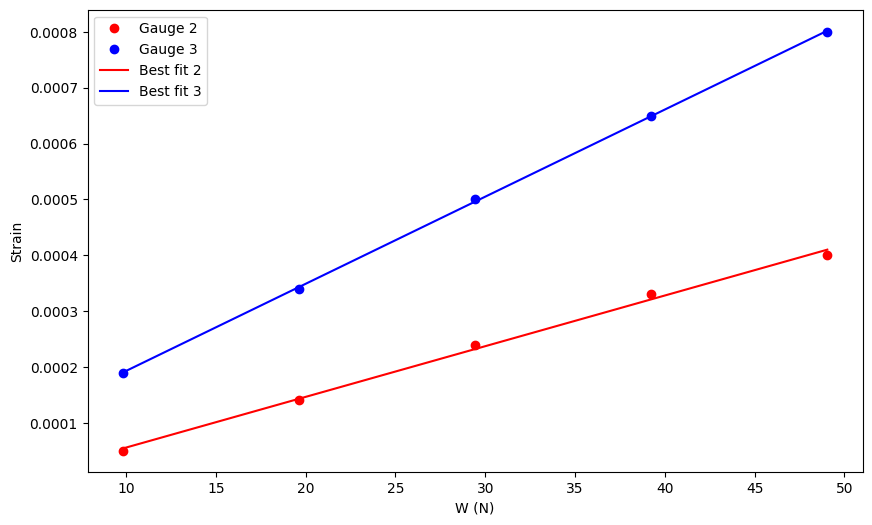

Slope for Gauge 2: 9.072375127420999e-06
Slope for Gauge 3: 1.5596330275229357e-05
------------------------------------
R-squared for Gauge 2: 0.996602918973327
R-squared for Gauge 3: 0.9998718605843157
------------------------------------
Young's Modulus with Gauge 2: 980775051593.671  Pa
Young's Modulus with Gauge 3: 282263267511.729  Pa
------------------------------------
Young's Modulus for Gauge 2 in GPa: 980.775051593671  GPa
Young's Modulus for Gauge 3 in GPa: 282.263267511729  GPa


In [18]:
M = np.array([1,2,3,4,5])
W = M * 9.81

# Gauge 2
strain_2 = np.array([0.00005, 0.00014, 0.00024, 0.00033, 0.00040])

# Gauge 3
strain_3 = np.array([0.00019, 0.00034, 0.00050, 0.00065, 0.00080])

# Performing linear regression and getting the slope and intercept
slope_2, intercept_2 = np.polyfit(W, strain_2, 1)
slope_3, intercept_3 = np.polyfit(W, strain_3, 1)

# Creating lines of best fit
best_fit_2 = slope_2 * W + intercept_2
best_fit_3 = slope_3 * W + intercept_3

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(W, strain_2, 'o', label='Gauge 2', color = 'r')
plt.plot(W, strain_3, 'o', label='Gauge 3', color = 'b')

# Plotting lines of best fit
plt.plot(W, best_fit_2, '-', color='red', label='Best fit 2')
plt.plot(W, best_fit_3, '-', color='blue', label='Best fit 3')

plt.xlabel('W (N)')
plt.ylabel('Strain')
plt.legend()
plt.show()

# Calculate R-squared values for each line of best fit
r_squared_2 = np.corrcoef(W, strain_2)[0, 1]**2
r_squared_3 = np.corrcoef(W, strain_3)[0, 1]**2

# Print the slopes and R-squared values
print("Slope for Gauge 2:", slope_2)
print("Slope for Gauge 3:", slope_3)
print('------------------------------------')
print("R-squared for Gauge 2:", r_squared_2)
print("R-squared for Gauge 3:", r_squared_3)
print('------------------------------------')

# Young's Modulus Calculation
# With Gauge 2
YM_2 = (9.81/ slope_2) * 6*(d_micrometer-d2)/(0.0063**2 * 0.0254)

# With Gauge 3
YM_3 = (9.81/ slope_3) * 6*(d_micrometer-d3)/(0.0063**2 * 0.0254)

print("Young's Modulus with Gauge 2:", YM_2, " Pa")
print("Young's Modulus with Gauge 3:", YM_3, " Pa")
print("------------------------------------")
print("Young's Modulus for Gauge 2 in GPa:", YM_2/10**9, " GPa")
print("Young's Modulus for Gauge 3 in GPa:", YM_3/10**9, " GPa") # These are both wrong

3. Plotting $\varepsilon_{\ell}$ versus $y$ for the compression data

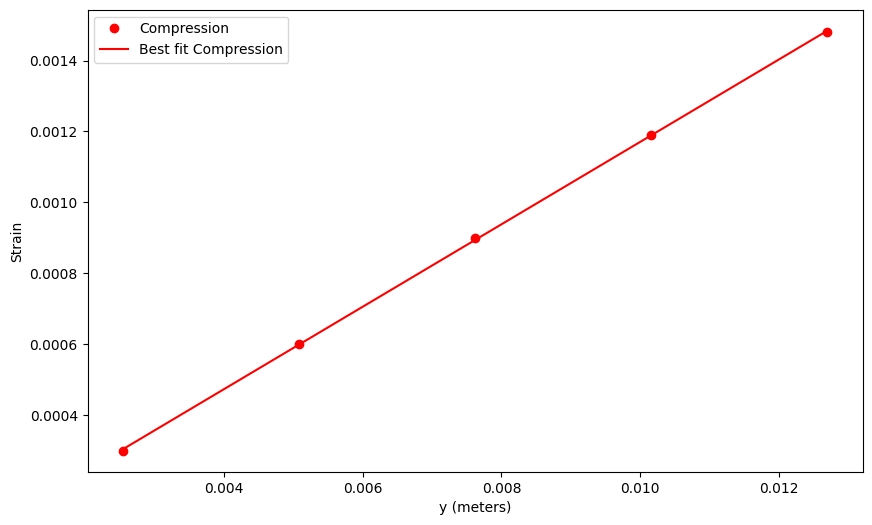

Slope for Compression: 0.11614173228346457
Slope for Extension: 0.1198818897637795
Percent error for Compression: 3.1198686371099953
R-squared for Compression: 0.999919569813402


In [19]:
strain_compression = np.array([0.00030, 0.00060, 0.00090, 0.00119, 0.00148])

# Performing linear regression and getting the slope and intercept
slope_compression, intercept_compression = np.polyfit(y, strain_compression, 1)

# Creating lines of best fit
best_fit_compression = slope_compression * y + intercept_compression

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(y, strain_compression, 'o', label='Compression', color = 'r')

# Plotting lines of best fit
plt.plot(y, best_fit_compression, '-', color='red', label='Best fit Compression')

plt.xlabel('y (meters)')
plt.ylabel('Strain')
plt.legend()
plt.show()

# Comparing slopes with extension data from part 1
print("Slope for Compression:", slope_compression)
print("Slope for Extension:", slope_1)
print("Percent error for Compression:", abs((slope_compression - slope_1) / slope_1) * 100)

# Calculate R-squared value for the line of best fit
r_squared_compression = np.corrcoef(y, strain_compression)[0, 1]**2

# Print the R-squared value
print("R-squared for Compression:", r_squared_compression)


4. Poisson's ratio

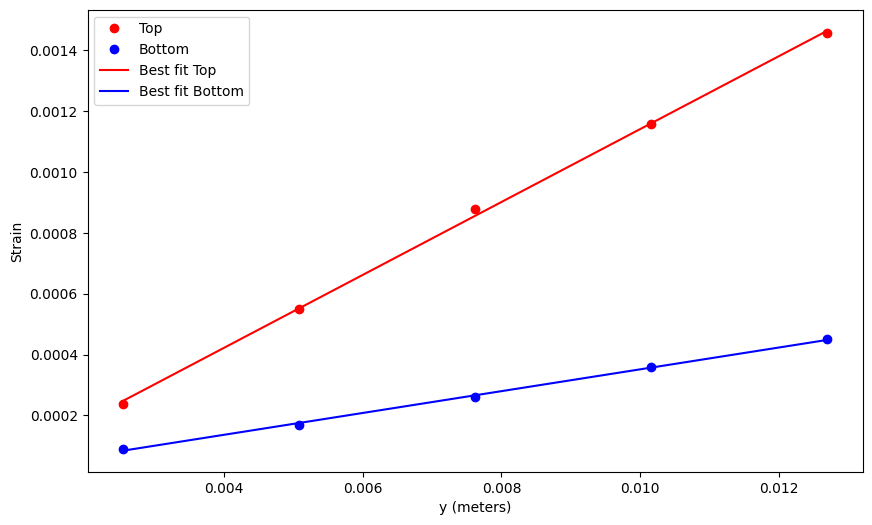

Poisson's ratio: 0.29925351047387283
Percent error for Poisson's ratio: 7.921996777269902
------------------------------------
R-squared for Top: 0.9993150514923852
R-squared for Bottom: 0.998673420164014


In [20]:
strain_bottom = np.array([0.00009, 0.00017, 0.00026, 0.00036, 0.00045])

strain_top = np.array([0.00024, 0.00055, 0.00088, 0.00116, 0.00146])
strain_top = strain_top - (0.01 * strain_bottom)

# Performing linear regression and getting the slope and intercept
slope_top, intercept_top = np.polyfit(y, strain_top, 1)
slope_bottom, intercept_bottom = np.polyfit(y, strain_bottom, 1)

# Creating lines of best fit
best_fit_top = slope_top * y + intercept_top
best_fit_bottom = slope_bottom * y + intercept_bottom

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(y, strain_top, 'o', label='Top', color = 'r')
plt.plot(y, strain_bottom, 'o', label='Bottom', color = 'b')

# Plotting lines of best fit
plt.plot(y, best_fit_top, '-', color='red', label='Best fit Top')
plt.plot(y, best_fit_bottom, '-', color='blue', label='Best fit Bottom')

plt.xlabel('y (meters)')
plt.ylabel('Strain')
plt.legend()
plt.show()

# Poisson's ratio
v = slope_bottom / slope_top
v_exp = 0.325

print("Poisson's ratio:", v)
print("Percent error for Poisson's ratio:", abs((v - v_exp) / v_exp) * 100)
print('------------------------------------')

# Calculate R-squared values for each line of best fit
r_squared_top = np.corrcoef(y, strain_top)[0, 1]**2
r_squared_bottom = np.corrcoef(y, strain_bottom)[0, 1]**2

# Print the slopes
print("Slope for Top:", slope_top)
print("Slope for Bottom:", slope_bottom)

print('------------------------------------')

# Print the R-squared values
print("R-squared for Top:", r_squared_top)
print("R-squared for Bottom:", r_squared_bottom)
